In [3]:
#load model and testing data
from tensorflow import keras
import pickle

model = keras.models.load_model('../models/pre_model_2_6.keras')

with open('../local_data/test_img_2.pickle', 'rb') as f:
    X_test, y_test = pickle.load(f)

In [4]:
X_test.shape, y_test.shape

((442, 512, 512, 3), (442, 2))

In [5]:
import numpy as np
from keras.utils import to_categorical
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=1), predicted_classes))

14/14 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       281
           1       0.82      0.71      0.76       161

    accuracy                           0.84       442
   macro avg       0.83      0.81      0.82       442
weighted avg       0.84      0.84      0.84       442



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


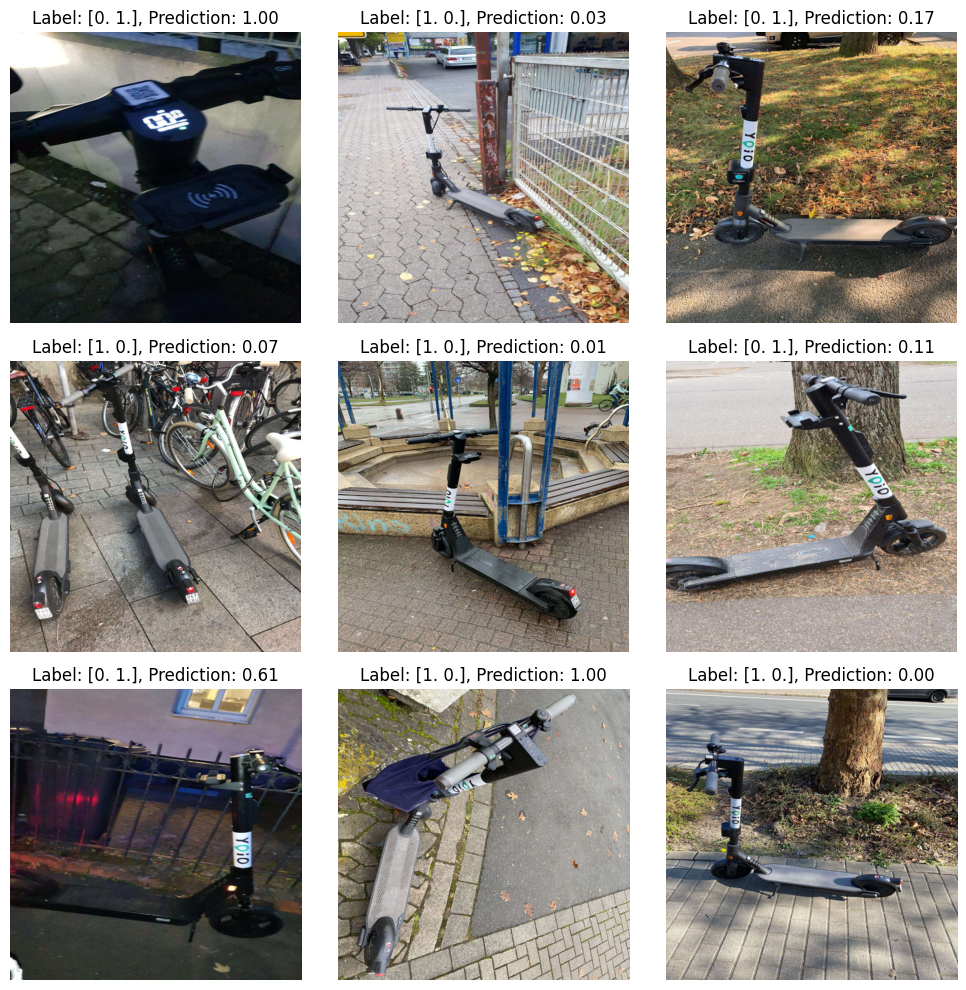

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure X_test, y_test, and predicted_classes are defined and accessible in this cell
X_test = X_test.astype(np.float32)

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(X_test.shape[0])
    ax.imshow(X_test[idx])
    ax.set_title(f"Label: {y_test[idx]}, Prediction: {model.predict(X_test[idx][np.newaxis, ...])[0][1]:.2f}")
    ax.axis('off')
plt.tight_layout()
plt.show()

Visualizing test images...
Index: 82, Shape of X_test[idx]: (512, 512, 3)
Label: 0, Prediction: 0
Index: 22, Shape of X_test[idx]: (512, 512, 3)
Label: 1, Prediction: 0
Index: 286, Shape of X_test[idx]: (512, 512, 3)
Label: 0, Prediction: 0
Index: 322, Shape of X_test[idx]: (512, 512, 3)
Label: 1, Prediction: 1
Index: 393, Shape of X_test[idx]: (512, 512, 3)
Label: 0, Prediction: 0
Index: 357, Shape of X_test[idx]: (512, 512, 3)
Label: 0, Prediction: 1
Index: 293, Shape of X_test[idx]: (512, 512, 3)
Label: 0, Prediction: 0
Index: 19, Shape of X_test[idx]: (512, 512, 3)
Label: 0, Prediction: 1
Index: 121, Shape of X_test[idx]: (512, 512, 3)
Label: 1, Prediction: 1


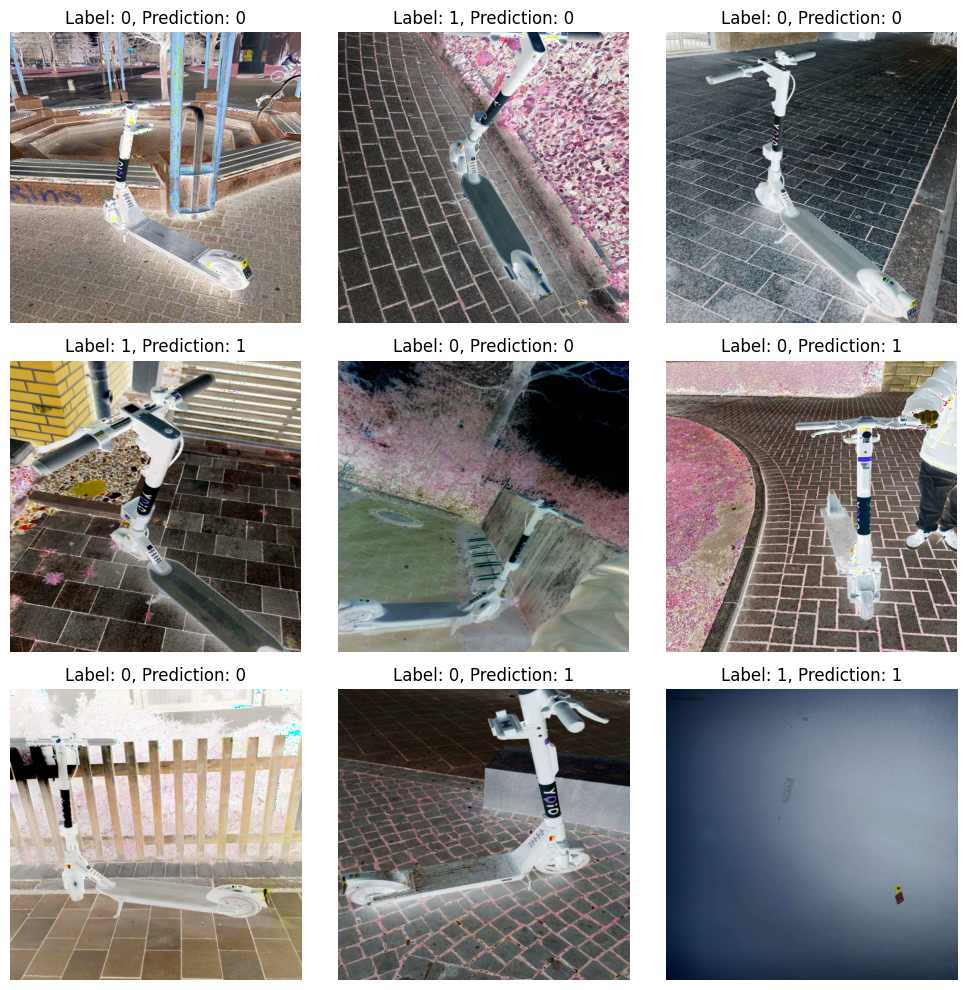

In [5]:
#because above doesnt work for me (anton)
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

print("Visualizing test images...")

# Ensure X_test is in the correct format for display
X_test = X_test.astype(np.float32)

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    idx = random.randint(0, X_test.shape[0] - 1)  # Use random.randint to avoid boundary issues
    
    # Print index and shapes
    print(f"Index: {idx}, Shape of X_test[idx]: {X_test[idx].shape}")
    
    # Print label and prediction values
    print(f"Label: {np.argmax(y_test[idx])}, Prediction: {predicted_classes[idx]}")
    
    # Rescale the image for display purposes
    image_display = (X_test[idx] * 255).astype(np.uint8)
    
    # Ensure the image is in the correct format (RGB)
    if image_display.shape[-1] == 1:  # If the image is grayscale
        image_display = np.squeeze(image_display, axis=-1)
    elif image_display.shape[-1] == 3:  # If the image is BGR (OpenCV format)
        image_display = cv2.cvtColor(image_display, cv2.COLOR_BGR2RGB)
    
    ax.imshow(image_display)
    ax.set_title(f"Label: {np.argmax(y_test[idx])}, Prediction: {predicted_classes[idx]}")
    ax.axis('off')
plt.tight_layout()
plt.show()